# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Data augmentation

In [4]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# CNN model creation

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Model compilation

In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

# Early stopping

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model training with data augmentation and early stopping

In [8]:
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/30


2023-05-16 18:16:59.086493: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


469/469 [==============================] - 10s 21ms/step - loss: 0.3705 - accuracy: 0.8856 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 2/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1252 - accuracy: 0.9621 - val_loss: 0.0367 - val_accuracy: 0.9880
Epoch 3/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0916 - accuracy: 0.9720 - val_loss: 0.0420 - val_accuracy: 0.9864
Epoch 4/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 5/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 6/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0267 - val_accuracy: 0.9916
Epoch 7/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0253 - val_accuracy: 0.9921
Epo

# Model Evaluation

313/313 [==============================] - 1s 2ms/step
Test loss: 0.020390259101986885
Test accuracy: 0.9921000003814697
Precision: 0.9920979962059568
Recall: 0.9920407658292619
F1 Score: 0.9920655901246361


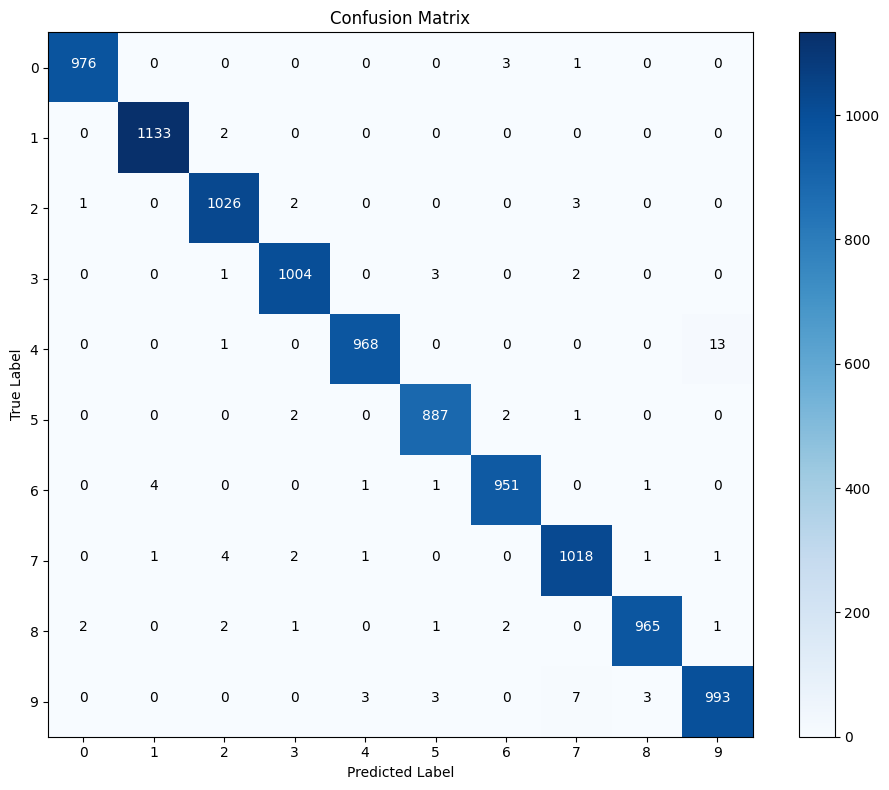

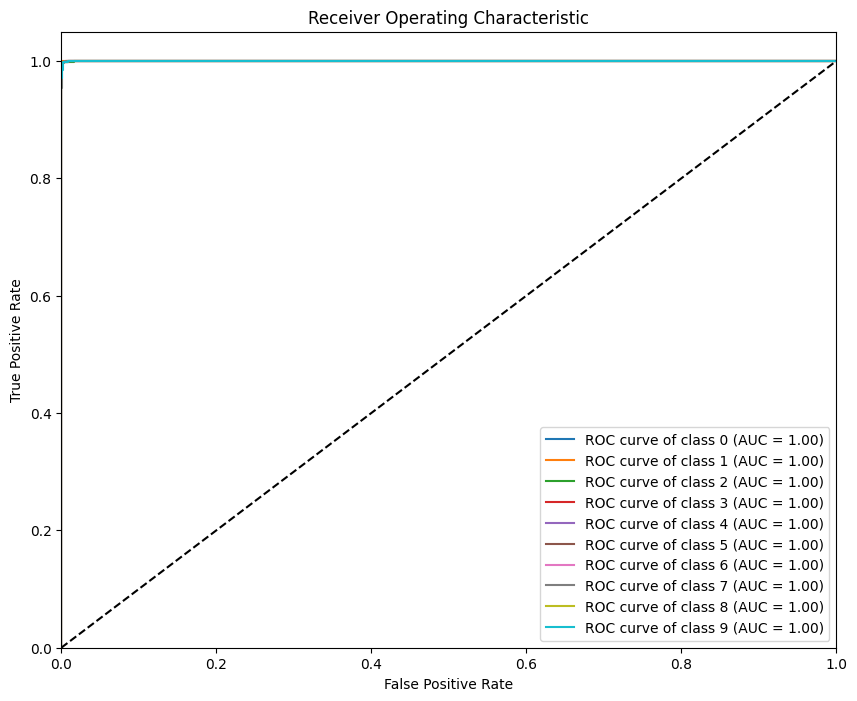

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.0
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()